# Vôos no Brasil

Esse notebook tem com objetivo demonstrar o acesso aos dados referentes aos vôos nacionais e internacionais, com origem ou destino no Brasil, disponibilizados pelo [Portal da Agência Nacional de Aviação Cívil][portal1].

* https://www.anac.gov.br/assuntos/dados-e-estatisticas/dados-estatisticos/dados-estatisticos

[portal1]: <https://www.anac.gov.br/assuntos/dados-e-estatisticas/dados-estatisticos/arquivos> 

Neste notebook, buscaremos responder algumas pergunts como: quais são os países que mais enviam vôos para o Brasil, quais são os países que mais são destinos de vôos partindo do Brasil, qual o número de passageiros que traféga nesses vôos, quantas decolagens por aeroporto, quantos passageiros por aeroporto, quais os trechos locais mais utilizados...


Antes de começar a trabalhar com os arquivos, vamos importar as bibliotecas que serão utilizadas, bem como inicializar configurações de ambiente.

In [3]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pyxlsb import open_workbook

import seaborn as sns
sns.set(style="whitegrid")
pal = sns.dark_palette("palegreen", as_cmap=True)

%matplotlib inline
matplotlib.style.use('ggplot')

In [14]:
#with open_workbook('../data/anac-2019.xlsb') as wb:
#    with wb.get_sheet(1) as sheet:
#        for row in sheet.rows():
#            print(row)
df_teste = pd.read_csv('../data/anac-2019.csv', delimiter=';')

In [15]:
df_teste.head()

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),...,COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS,DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
0,AAF,AIGLE AZUR,ESTRANGEIRA,2019,1,LFPO,PARIS,NaN,NaN,FRANÇA,...,NaN,82240.0,16.0,505287700.0,0.0,0.0,4592.0,770089.0,NaN,NaN
1,AAF,AIGLE AZUR,ESTRANGEIRA,2019,1,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,...,NaN,82000.0,16.0,134690125.0,13806750.0,0.0,4592.0,770089.0,NaN,NaN
2,AAF,AIGLE AZUR,ESTRANGEIRA,2019,2,LFPO,PARIS,NaN,NaN,FRANÇA,...,NaN,82240.0,16.0,338700300.0,0.0,0.0,4592.0,770089.0,NaN,NaN
3,AAF,AIGLE AZUR,ESTRANGEIRA,2019,2,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,...,NaN,82000.0,16.0,0.0,0.0,0.0,4592.0,770089.0,NaN,NaN
4,AAF,AIGLE AZUR,ESTRANGEIRA,2019,3,LFPO,PARIS,NaN,NaN,FRANÇA,...,NaN,87380.0,17.0,470124960.0,0.0,0.0,4879.0,1252271.0,NaN,NaN


```python
!pip install pyxlsb
```

Com base nos dados disponibilizados no Portal da ANAC, criei um arquivo .CSV para facilitar a extração dos dados pela biblioteca Pandas. Vamos baixar esse arquivo do Github e iniciar o processo de análise dos dados.

Utilizaremos o método *urlretrieve* da biblioteca **urllib** para obter o arquivo. Em seguida, utilizaremos a função *read_csv* da biblioteca Pandas para fazer a importação dos dados.

O arquivo CSV possui o seguinte cabeçalho:

    EMPRESA (SIGLA);EMPRESA (NOME);EMPRESA (NACIONALIDADE);ANO;MÊS;AEROPORTO DE ORIGEM (SIGLA);AEROPORTO DE ORIGEM (NOME);AEROPORTO DE ORIGEM (UF);AEROPORTO DE ORIGEM (REGIÃO);AEROPORTO DE ORIGEM (PAÍS);AEROPORTO DE ORIGEM (CONTINENTE);AEROPORTO DE DESTINO (SIGLA);AEROPORTO DE DESTINO (NOME);AEROPORTO DE DESTINO (UF);AEROPORTO DE DESTINO (REGIÃO);AEROPORTO DE DESTINO (PAÍS);AEROPORTO DE DESTINO (CONTINENTE);NATUREZA;GRUPO DE VOO;PASSAGEIROS PAGOS;PASSAGEIROS GRÁTIS;CARGA PAGA (KG);CARGA GRÁTIS (KG);CORREIO (KG);ASK;RPK;ATK;RTK;COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS;DISTÂNCIA VOADA (KM);DECOLAGENS;CARGA PAGA KM;CARGA GRATIS KM;CORREIO KM;ASSENTOS;PAYLOAD;HORAS VOADAS
    
    
Porém, para realizar a nossa análise, utilizaremos apenas algumas dessas colunas. Passaremos uma lista com essas colunas como o  parâmetro *usecols* do método **read_csv**.   
   

In [4]:
flight_data = pd.read_csv("../data/anac-dados-estatisticos.csv", delimiter=";", encoding="latin1")

In [5]:
flight_data.head()

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,Mï¿½S,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIï¿½O),AEROPORTO DE ORIGEM (PAï¿½S),...,COMBUSTï¿½VEL (LITROS) - APENAS EMPRESAS BRASILEIRAS,DISTï¿½NCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
0,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,KDFW,DALLAS/FORT WORTH,NaN,NaN,ESTADOS UNIDOS,...,NaN,"246750,00","30,00","805030100,00","0,00","600425,00","6330,00","1050000,00",NaN,NaN
1,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,KJFK,NEW YORK,NaN,NaN,ESTADOS UNIDOS,...,NaN,"223068,00","29,00","342463224,00","0,00","61797528,00","6119,00","464000,00",NaN,NaN
2,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,KJFK,NEW YORK,NaN,NaN,ESTADOS UNIDOS,...,NaN,"221444,00","29,00","1488997092,00","0,00","15119280,00","6119,00","1015000,00",NaN,NaN
3,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,KMIA,MIAMI,NaN,NaN,ESTADOS UNIDOS,...,NaN,"26748,00","4,00","134769798,00","6339276,00","20923623,00","0,00","0,00",NaN,NaN
4,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,KMIA,MIAMI,NaN,NaN,ESTADOS UNIDOS,...,NaN,"180549,00","27,00","673601571,00","39948138,00","208734705,00","5486,00","910000,00",NaN,NaN


In [6]:
flight_data.dtypes

EMPRESA (SIGLA)                                         object
EMPRESA (NOME)                                          object
EMPRESA (NACIONALIDADE)                                 object
ANO                                                      int64
Mï¿½S                                                    int64
AEROPORTO DE ORIGEM (SIGLA)                             object
AEROPORTO DE ORIGEM (NOME)                              object
AEROPORTO DE ORIGEM (UF)                                object
AEROPORTO DE ORIGEM (REGIï¿½O)                          object
AEROPORTO DE ORIGEM (PAï¿½S)                            object
AEROPORTO DE ORIGEM (CONTINENTE)                        object
AEROPORTO DE DESTINO (SIGLA)                            object
AEROPORTO DE DESTINO (NOME)                             object
AEROPORTO DE DESTINO (UF)                               object
AEROPORTO DE DESTINO (REGIï¿½O)                         object
AEROPORTO DE DESTINO (PAï¿½S)                          

Criaremos duas colunas temporárias, uma chamada PASSAGEIROS TOTAL, que engloba a soma dos Passageiros Pagos (Clientes) e dos Passageiros Grátis (tripulação, convidados?). Também criaremos uma coluna ASSENTOS VAGOS, contendo a diferença entre o número de assentos médio de cada trecho com o total de passageiros médio de cada trecho.

In [7]:
flight_data["PASSAGEIROS TOTAL"] = flight_data["PASSAGEIROS PAGOS"] + flight_data[u'PASSAGEIROS GRÁTIS']
flight_data["ASSENTOS VAGOS"] = flight_data["ASSENTOS"] - flight_data["PASSAGEIROS TOTAL"]

KeyError: 'PASSAGEIROS GRÁTIS'

Primeiro vamos trabalhar com os vôos que chegam ao Brasil. Para isso, iremos criar uma váriavel **inbound_flights** contendo os registros onde o país de destino é o Brasil, onde existem passageiros e onde o país de origem não é o Brasil (ou seja, somente vôos que venham do exterior).

Nossa segunda etapa será agrupar os dados por trecho (Aeroporto de Origem - Aeroporto de Destino). Com isso podemos calcular e plotar o total de decolagens em cada trecho, e o número de passageiros transportados, bem como o número de assentos vagos nos vôos.

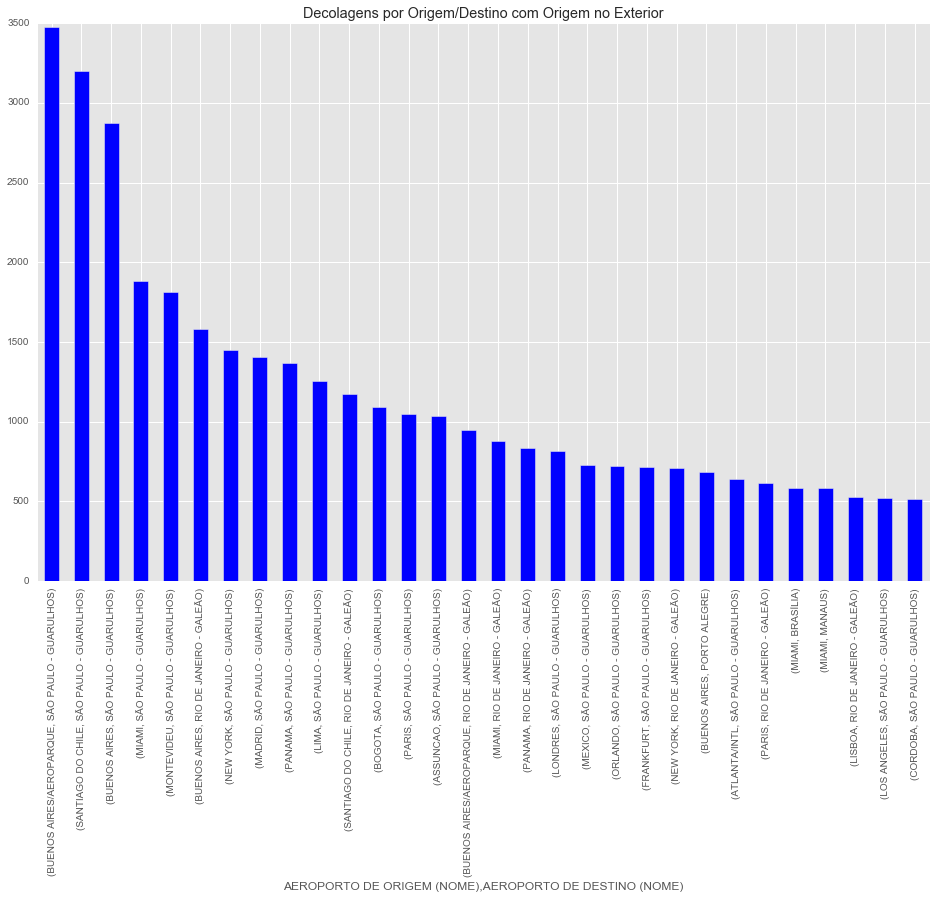

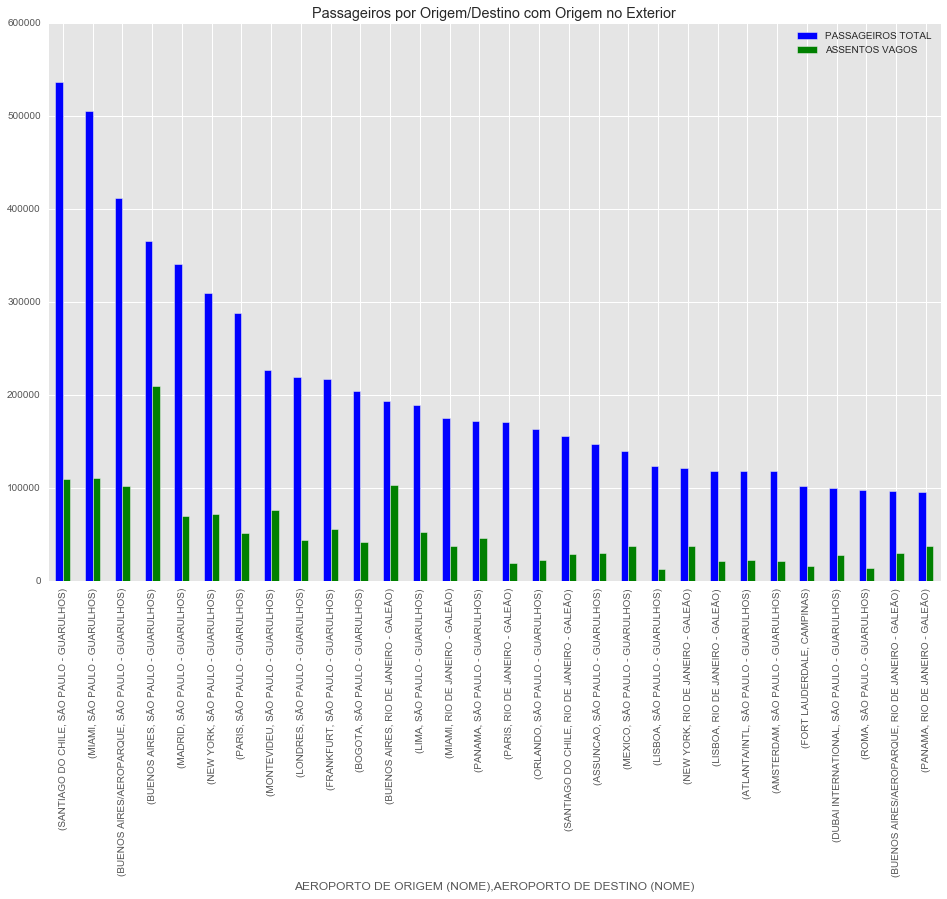

In [5]:
inbound_flights = flight_data[ (flight_data[u"AEROPORTO DE DESTINO (PAÍS)"] == "BRASIL") &
                               (flight_data["PASSAGEIROS TOTAL"] > 0) &
                               (flight_data[u"AEROPORTO DE ORIGEM (PAÍS)"] != "BRASIL")
                             ]
inbound_flights_by_airport = inbound_flights.groupby([u'AEROPORTO DE ORIGEM (NOME)', u'AEROPORTO DE DESTINO (NOME)'])

top30 = inbound_flights_by_airport["DECOLAGENS"].sum().sort_values(ascending=False)[:30]

top30.plot(kind='bar', figsize=(16,10), title='Decolagens por Origem/Destino com Origem no Exterior')

plt.figure()

top30 = inbound_flights_by_airport["PASSAGEIROS TOTAL", "ASSENTOS VAGOS"].sum().sort_values("PASSAGEIROS TOTAL", ascending=False)[:30]
top30.plot(kind='bar', figsize=(16,10), title='Passageiros por Origem/Destino com Origem no Exterior')


Muitos países possuem vários aeroportos que enviam vôos para o Brasil. Nos gráficos acima é fácil perceber que Miami, Nova York, Orlando e Atlanta, por exemplo, enviam muitos passageiros para o Brasil. Vamos agora agrupar os vôos que chegao ao Brasil pelo País de Origem. Esses dados ficarão na variável *inbound_flights_by_country*.

Com ela será possível plotar um gráfico mostrando o total de decolagens provenientes de cada país, e na próxima série, o número de passageiros que vieram de cada um desses países.



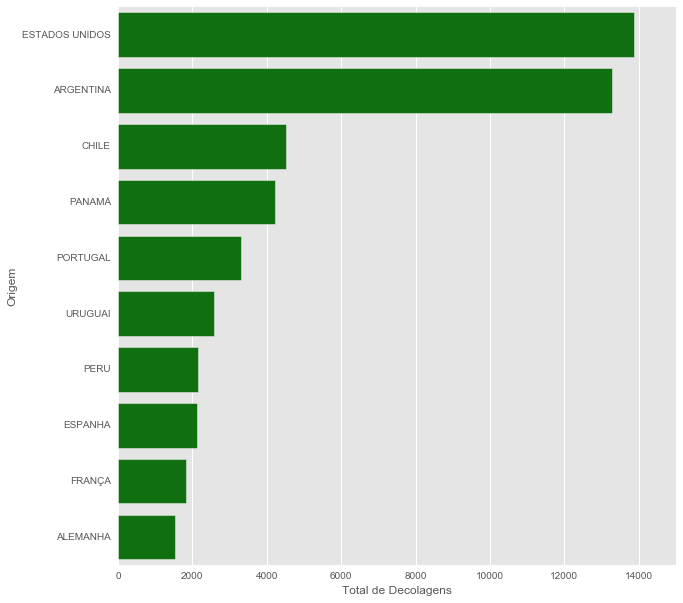

In [6]:
inbound_flights_by_country = inbound_flights.groupby(u'AEROPORTO DE ORIGEM (PAÍS)')

top10 = inbound_flights_by_country["DECOLAGENS"].sum().sort_values(ascending=False).reset_index()[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=u"AEROPORTO DE ORIGEM (PAÍS)", x="DECOLAGENS", data=top10, label="DECOLAGENS", orient='h', color='g')
ax.set(xlim=(0, 15000), ylabel="Origem", xlabel="Total de Decolagens")
sns.despine(left=True, bottom=True)

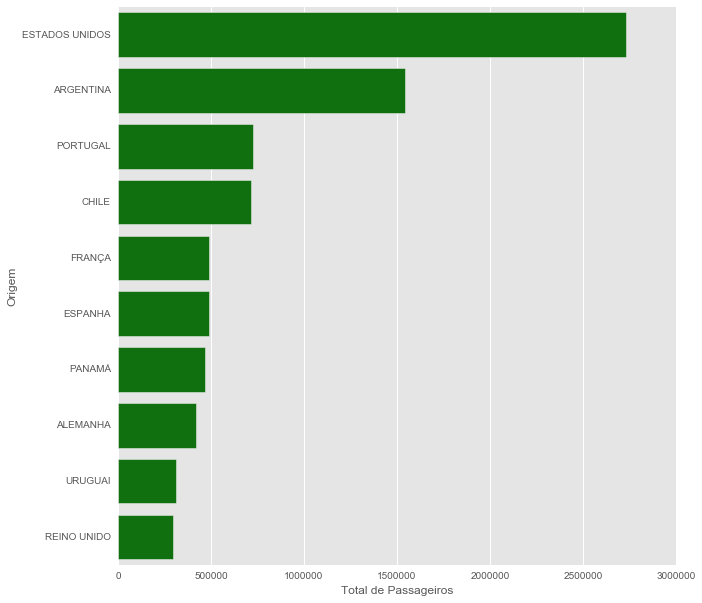

In [7]:
top10 = inbound_flights_by_country["PASSAGEIROS TOTAL"].sum().sort_values(ascending=False).reset_index()[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=u"AEROPORTO DE ORIGEM (PAÍS)", x="PASSAGEIROS TOTAL", data=top10, label="DECOLAGENS", orient='h', color='g')
ax.set(ylabel="Origem", xlabel="Total de Passageiros")
sns.despine(left=True, bottom=True)

Para calcular os vôos que saem ao Brasil, utilizaremos uma lógica similar a apresentada acima. Para isso, iremos criar uma váriavel **outbound_flights** contendo os registros onde o país de origem é o Brasil, onde existem passageiros e onde o país de destino não é o Brasil (ou seja, somente vôos que vão para o exterior).

Nossa segunda etapa será agrupar os dados por trecho (Aeroporto de Origem - Aeroporto de Destino). Com isso podemos calcular e plotar o total de decolagens em cada trecho, e o número de passageiros transportados, bem como o número de assentos vagos nos vôos.

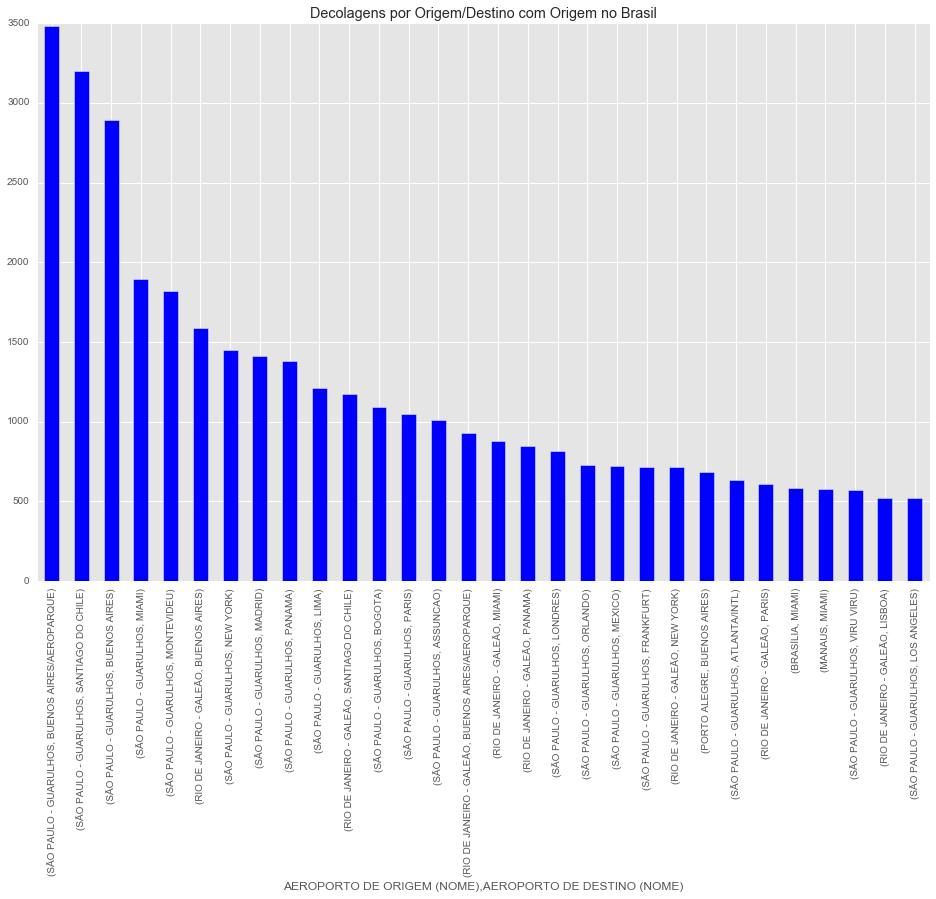

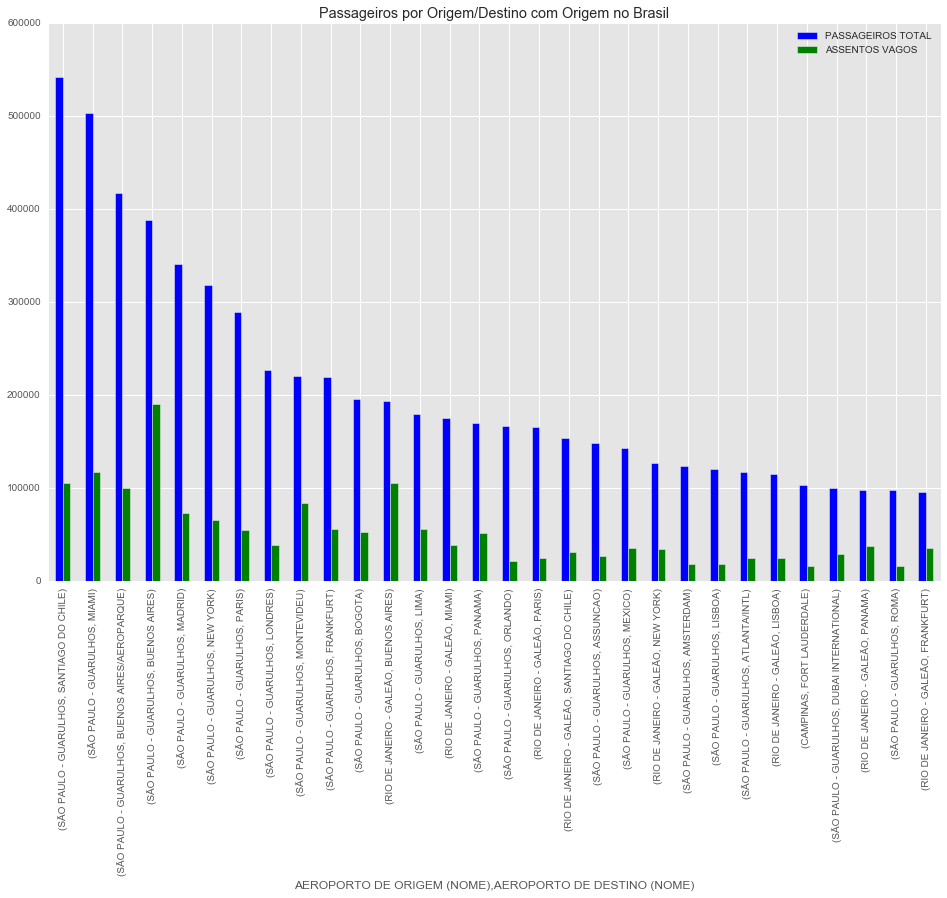

In [8]:
outbound_flights = flight_data[ (flight_data[u"AEROPORTO DE ORIGEM (PAÍS)"] == "BRASIL") &
                                (flight_data["PASSAGEIROS TOTAL"] > 0) &
                                (flight_data[u"AEROPORTO DE DESTINO (PAÍS)"] != "BRASIL")
                              ]

outbound_flights_by_airport = outbound_flights.groupby([u'AEROPORTO DE ORIGEM (NOME)', u'AEROPORTO DE DESTINO (NOME)'])

top30 = outbound_flights_by_airport["DECOLAGENS"].sum().sort_values(ascending=False)[:30]
top30.plot(kind='bar', figsize=(16,10), title='Decolagens por Origem/Destino com Origem no Brasil')

plt.figure()

top30 = outbound_flights_by_airport["PASSAGEIROS TOTAL", "ASSENTOS VAGOS"].sum().sort_values("PASSAGEIROS TOTAL", ascending=False)[:30]
top30.plot(kind='bar', figsize=(16,10), title='Passageiros por Origem/Destino com Origem no Brasil')


Do mesmo modo que calculamos o número de decolagens vindas de cada país até o Brasil, e o número de passageiros, vamos aplicar a mesma lógica e criar a variável *outbound_flights_by_country*. Logo após plotaremos o gráfico de decolagens para o Exterior por país, e o número de passageiros que enviamos para cada um desses países.

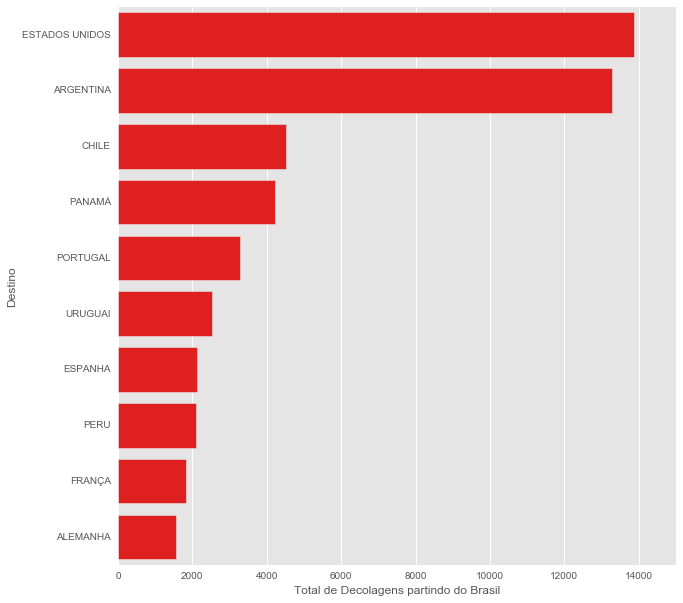

In [9]:
outbound_flights_by_country = outbound_flights.groupby(u'AEROPORTO DE DESTINO (PAÍS)')

top10 = outbound_flights_by_country["DECOLAGENS"].sum().sort_values(ascending=False).reset_index()[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=u"AEROPORTO DE DESTINO (PAÍS)", x="DECOLAGENS", data=top10, label="DECOLAGENS", orient='h', color='r')
ax.set(xlim=(0, 15000), ylabel="Destino", xlabel="Total de Decolagens partindo do Brasil")
sns.despine(left=True, bottom=True)

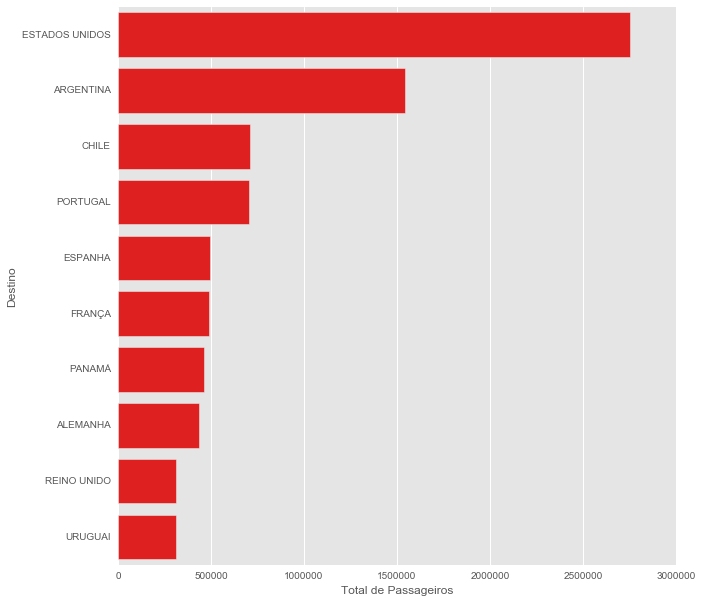

In [10]:
top10 = outbound_flights_by_country["PASSAGEIROS TOTAL"].sum().sort_values(ascending=False).reset_index()[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=u"AEROPORTO DE DESTINO (PAÍS)", x="PASSAGEIROS TOTAL", data=top10, label="DECOLAGENS", orient='h', color='r')
ax.set(ylabel="Destino", xlabel="Total de Passageiros")
sns.despine(left=True, bottom=True)

É possível ter uma idéia do comportamento das chegadas e saídas de cada mês plotando um gráfico em linha do número de passageiros totais nos vôos de chegada e dos vôos de saída. É possível detectar picos nos meses de Janeiro, Julho, Agosto e Dezembro. 

Esses meses coincidem com o período tradicional de férias ou de alta temporada.

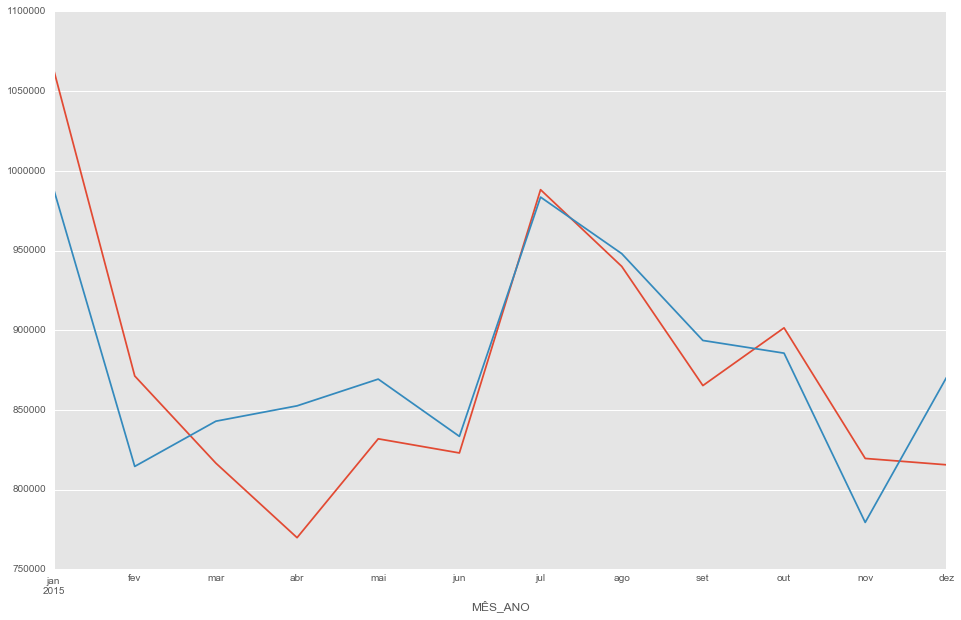

In [11]:
inbound_flights.groupby(u"MÊS_ANO")["PASSAGEIROS TOTAL"].sum().plot(figsize=(16,10),)
outbound_flights.groupby(u"MÊS_ANO")["PASSAGEIROS TOTAL"].sum().plot(figsize=(16,10),)

Finalmente, para acessar os dados relativos aos vôos domésticos, criaremos a variável *local_flights* que conterá apenas os registros onde o aeroporto de origem e destino é o Brasil e que contenham passageiros. A seguir agruparemos esses dados por combinação de aeroportos, como fizemos anteriormente. Serão plotados os gráficos de Decolagens em cada trecho, e os gráficos de passageiros totais e assentos vagos.



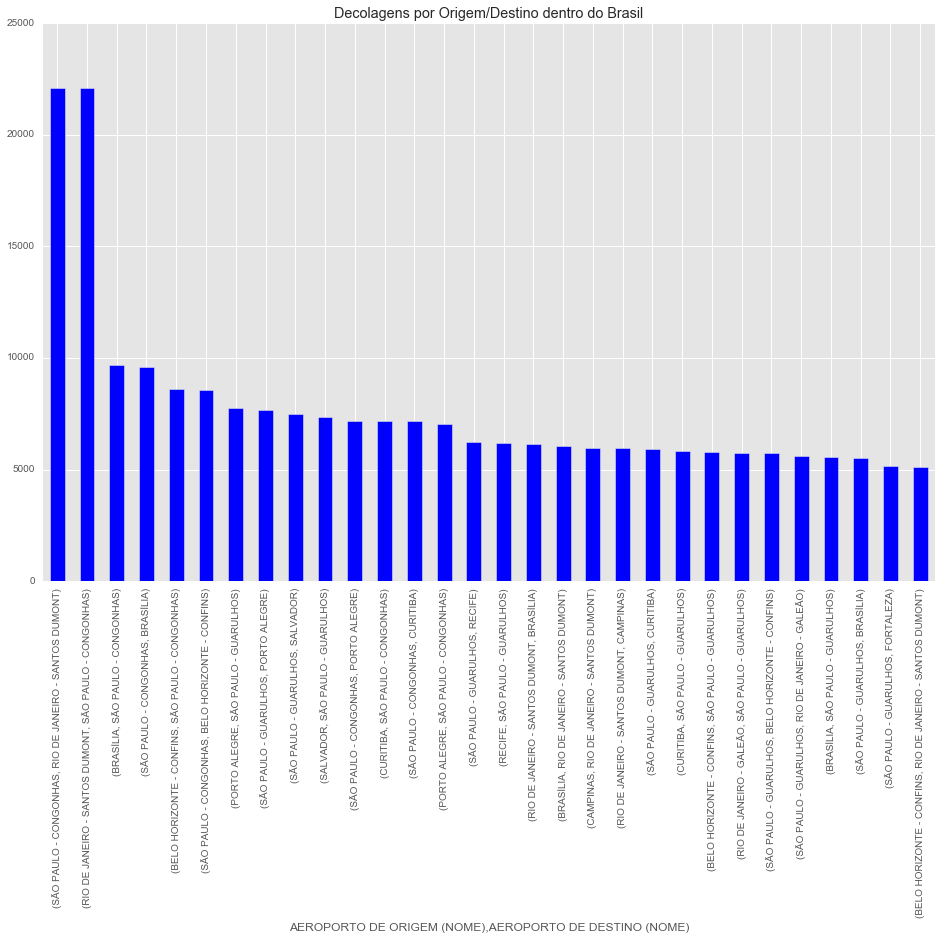

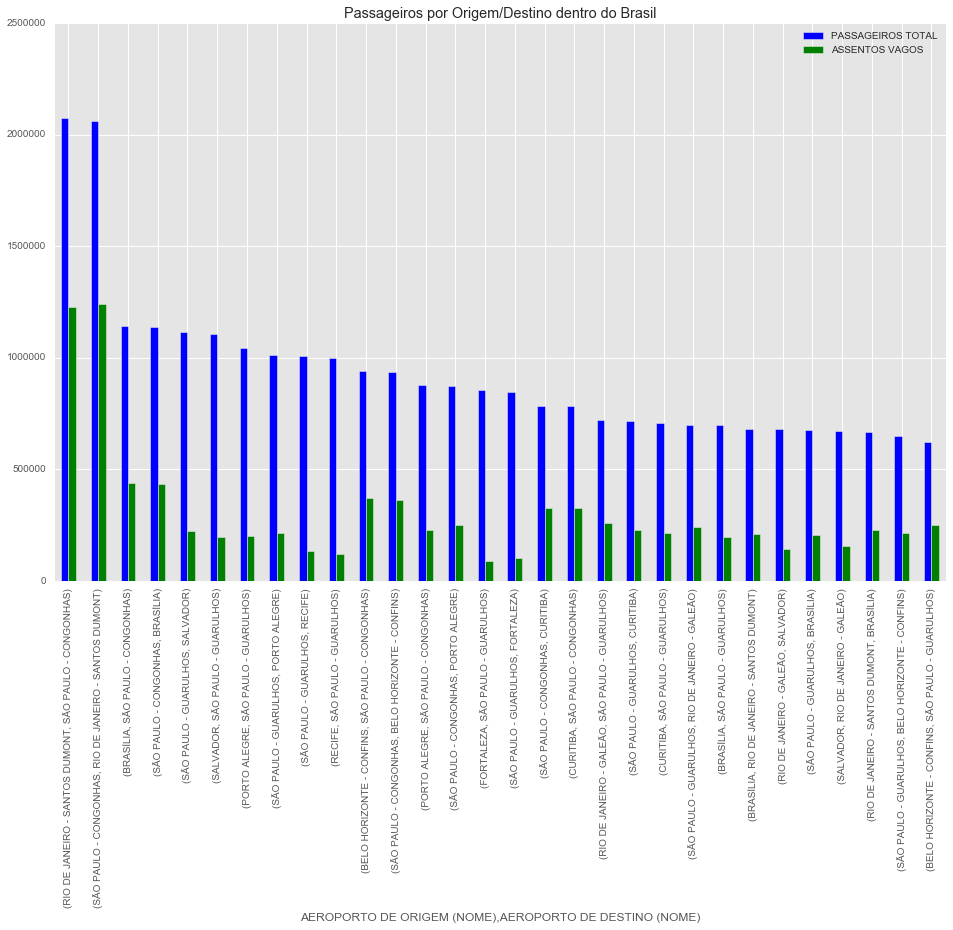

In [12]:
local_flights = flight_data[ (flight_data[u"AEROPORTO DE ORIGEM (PAÍS)"] == "BRASIL") &
                                (flight_data["PASSAGEIROS TOTAL"] > 0) &
                                (flight_data[u"AEROPORTO DE DESTINO (PAÍS)"] == "BRASIL")
                              ]

local_flights_by_airport = local_flights.groupby([u'AEROPORTO DE ORIGEM (NOME)', u'AEROPORTO DE DESTINO (NOME)'])

top30 = local_flights_by_airport["DECOLAGENS"].sum().sort_values(ascending=False)[:30]
top30.plot(kind='bar', figsize=(16,10), title='Decolagens por Origem/Destino dentro do Brasil')

plt.figure()

top30 = local_flights_by_airport["PASSAGEIROS TOTAL", "ASSENTOS VAGOS"].sum().sort_values("PASSAGEIROS TOTAL", ascending=False)[:30]
top30.plot(kind='bar', figsize=(16,10), title='Passageiros por Origem/Destino dentro do Brasil')

Podemos ver o número de aterrisagens por aeroporto, agrupando por Aeroporto de Destino, bem como o número de passageiros transportados dessa mesma maneira. A seguir serão plotados esses dois gráficos, com os 10 destinos mais frequentes e movimentados.

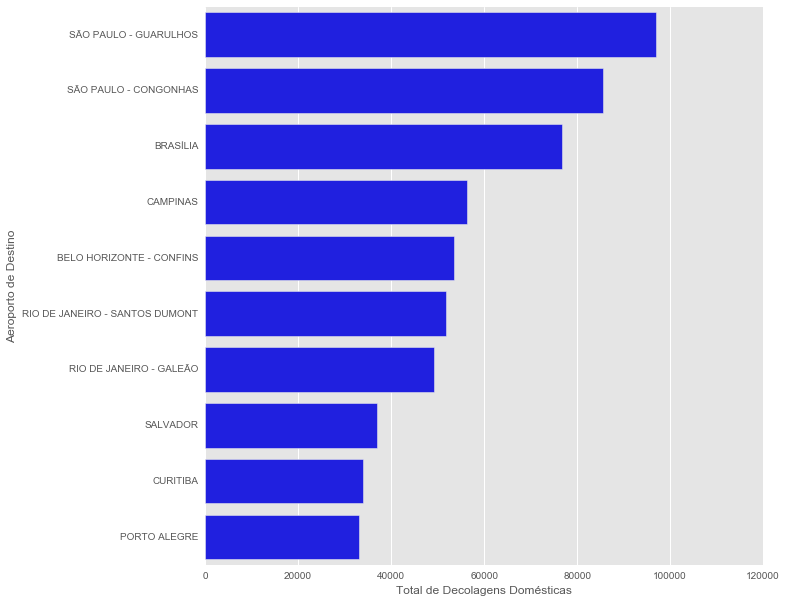

In [13]:
local_flights_by_airport = local_flights.groupby([u'AEROPORTO DE DESTINO (NOME)'])

top10 = local_flights_by_airport["DECOLAGENS"].sum().sort_values(ascending=False).reset_index()[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=u"AEROPORTO DE DESTINO (NOME)", x="DECOLAGENS", data=top10, label="DECOLAGENS", orient='h', color='b')
ax.set(xlim=(0, 120000), ylabel="Aeroporto de Destino", xlabel=u"Total de Decolagens Domésticas")
sns.despine(left=True, bottom=True)

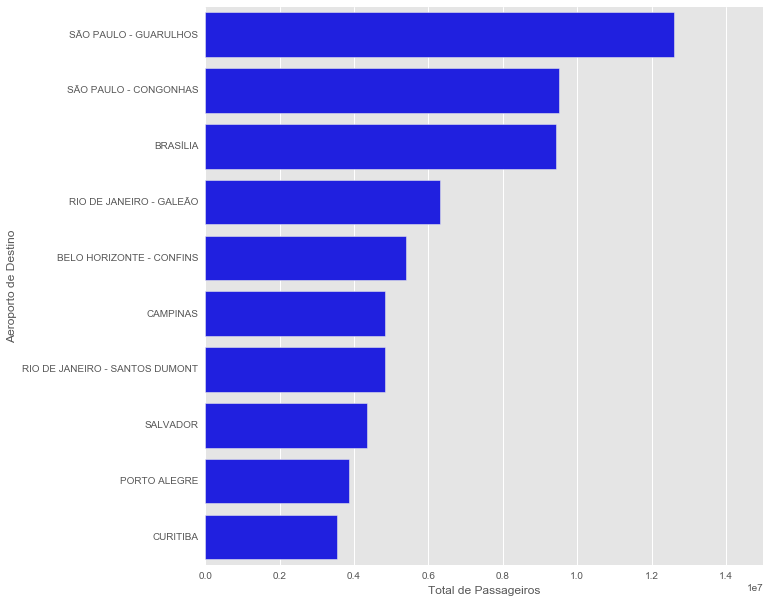

In [14]:
local_flights_by_airport = local_flights.groupby([u'AEROPORTO DE DESTINO (NOME)'])

top10 = local_flights_by_airport["PASSAGEIROS TOTAL"].sum().sort_values(ascending=False).reset_index()[:10]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=u"AEROPORTO DE DESTINO (NOME)", x="PASSAGEIROS TOTAL", data=top10, label="DECOLAGENS", orient='h', color='b')
ax.set(xlim=(0, 15000000), ylabel="Aeroporto de Destino", xlabel=u"Total de Passageiros")
sns.despine(left=True, bottom=True)

A última coisa que faremos hoje é calcular o total de passageiros transportados por empresa aérea. Esse gráfico pode ser obtido de maneira simples, bastando-se agrupar os dados pelo nome da Empresa. Plotaremos o total de passageiros transportados, e fica fácil observar que o mercado brasileiro é dominado por três grandes empresas (GOL, TAM e AZUL).

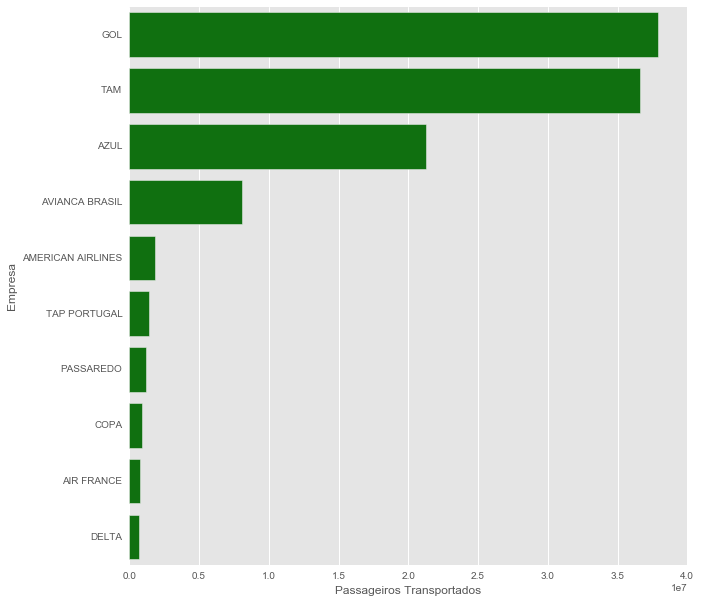

In [15]:
flights_by_company = flight_data.groupby("EMPRESA (NOME)")

top10 = flights_by_company["PASSAGEIROS TOTAL"].sum().sort_values(ascending=False).reset_index()[:10]

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=u"EMPRESA (NOME)", x="PASSAGEIROS TOTAL", data=top10, orient='h', color='g')
ax.set(ylabel="Empresa", xlabel=u"Passageiros Transportados")
sns.despine(left=True, bottom=True)

Espero que tenham gostado da leitura. Os dados estão disponíveis no Portal da ANAC. 